# 이미지 픽셀 조작 및 ROI 조작
- https://blog.naver.com/samsjang/220502203203


In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

from utils import convert_bgr_to_rgb, show_img_of_plt

plt.ion() # interactive mode

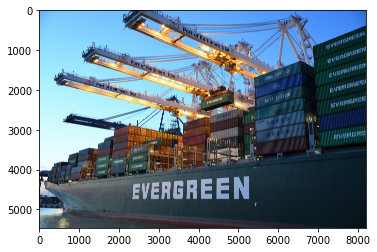

In [8]:
img = cv2.imread('./data/img/ship_01.jpg')
rgb_img = convert_bgr_to_rgb(img)
show_img_of_plt(rgb_img)

### 이미지 픽셀 값 얻고 수정하기  
한장의 이미지는 지정된 크기의 BGR 값들의 배열입니다. 예를 들어 10 x 10 크기의 이미지는 가로 10개, 세로 10개의 픽셀들의 행렬이고, 각 픽셀들은 (B,G,R)값을 가지고 있습니다. 여기서 B, G, R은 각각 0~255 사이의 정수가 되는 것입니다.  
만약 어떤 이미지를 읽고 특정 위치의 픽셀값을 얻으면 (B, G, R)의 값으로 나타납니다.  

In [3]:
img = cv2.imread('./data/img/ship_01.jpg')

px = img[340, 200]
px

array([254, 204, 128], dtype=uint8)

> (340, 200) 위치의 픽셀값을 출력하는 코드입니다.  
> 출력값은 [254, 204, 128]과 같습니다. 이것은 Blue(254), Green(204), Red(128)을 의미합니다.     
    
- img[340, 200] = [0,0,0]   
상기와 같이 코드를 수정하면 해당 위치가 검정색으로 바꾸게됩니다.  

In [5]:
img = cv2.imread('./data/img/ship_01.jpg')

B = img.item(340, 200, 0)
G = img.item(340, 200, 1)
R = img.item(340, 200, 2)
BGR = [B, G, R]
BGR

[254, 204, 128]

> Numpy array의 item()함수는 개별적인 픽셀에 접근할 수 있지만, B, G, R 개별적으로 접근해야 합니다.   
  
-  img.itemset((340, 200, 0), 100)  
(340, 200) 위치의 픽셀의 Blue 값을 100으로 변경하는 코드

### 이미지 속성 얻기
이미지 속성을 얻기 위해서는 Numpy array의 아래와 같은 값들에 접근하면 됩니다.   
- `img.shape`: 이미지 해상도 및 컬러 채널 (이미지 height, 이미지 width, 컬러 채널수)
- `img.size`: 이미지 사이즈(바이트)
- `img.dtype`: 이미지 데이터 타입

In [6]:
img = cv2.imread('./data/img/ship_01.jpg')

print(f'{img.shape}')
print(f'{img.size}')
print(f'{img.dtype}')

(5461, 8192, 3)
134209536
uint8


### 이미지 ROI(Region Of Image) 설정
이미지를 처리할 때, 이미지의 특정 영역에서 작업이 이루어지는 경우가 있습니다. 예를 들면, 눈(eye)을 찾는 다고 할 때, 이미지 전체에서 얼굴을 먼저 찾은 후, 이 얼굴 영역에서 눈을 찾는 것이 성능면에서 효율적이죠.    

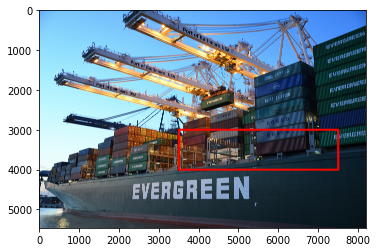

In [10]:
img = cv2.imread('./data/img/ship_01.jpg')

cv2.rectangle(img, (3500, 3000), (7500, 4000), (0, 0, 255), 50)
show_img_of_plt(img, is_bgr=True)

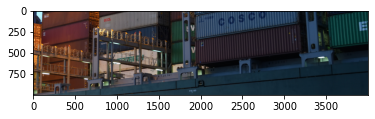

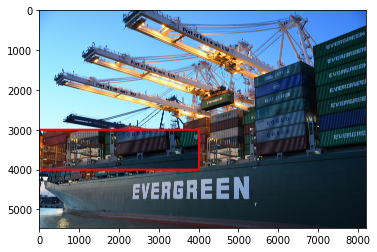

In [4]:
img = cv2.imread('./data/img/ship_01.jpg')

sub_img = img[3000:4000, 3500:7500]
show_img_of_plt(sub_img, is_bgr=True)

img[3000:4000, 0:4000] = sub_img
cv2.rectangle(img, (0, 3000), (4000, 4000), (0, 0, 255), 50)
show_img_of_plt(img, is_bgr=True)

### 이미지 채널 분할 및 합치기
필요시 컬러 이미지의 경우 B, G, R 채널별로 픽셀값들을 따로 분리해 놓을 수 있습니다. 그리고 분리해 놓은 B, G, R 채널을 합쳐서 컬러 이미지로 변환할 수도 있습니다.  

In [2]:
img = cv2.imread('./data/img/ship_01.jpg')

b, g, r = cv2.split(img)
print(img[100, 100])
print(b[100, 100], g[100, 100], r[100, 100])

[255 184 112]
255 184 112


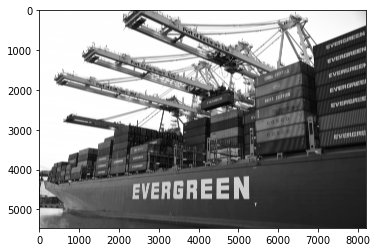

In [3]:
show_img_of_plt(b)